# Pré requisitos

In [ ]:
!pip install contractions

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Penn Treebank/Penn Treebank/Secs0-18 - training" #Ju

### Tokenization

In [ ]:
content = []
with open(path,'r') as r:
    for line in r:
        parts = line.strip().split()
        pt = [tuple(item.rsplit('_', 1)) for item in parts]
        content.extend(pt)

In [ ]:
content_sentences = []
with open(path,'r') as r:
    for line in r:
        parts = line.strip().split()
        pt = [tuple(item.rsplit('_', 1)) for item in parts]
        content_sentences.extend([pt])


# Contractions

In [ ]:
import contractions
import nltk

def expand_and_retag(sentence):
    """
    Recebe uma sentença do tipo:
        [('I', 'PRP'), ("don't", 'VB'), ('wanna', 'VB')]
    Expande as contrações e retaga com nltk:
        [('I', 'PRP'), ('do', 'VB'), ('not', 'RB'), ('want', 'VB'), ('to', 'TO')]
    """
    # Junta as palavras em texto
    raw_text = ' '.join([word for word, _ in sentence])

    # Expande contrações
    expanded_text = contractions.fix(raw_text)

    # Tokeniza e aplica POS tagging com nltk
    expanded_tokens = nltk.word_tokenize(expanded_text)
    retagged = nltk.pos_tag(expanded_tokens)

    return retagged


In [ ]:
expanded_sentences = [expand_and_retag(sentence) for sentence in content_sentences]


### Building the Vocab

In [ ]:
word2idx = {'<PAD>': 0, '<UNK>': 1}
tag2idx = {'<PAD>': 0}

In [ ]:
for sentence in expanded_sentences:
  for words_tags in sentence:
      word = words_tags[0]
      tag = words_tags[1]
      word2idx.setdefault(word.lower(), len(word2idx))
      tag2idx.setdefault(tag, len(tag2idx))

In [ ]:
def index_to_tag(tag2idx):
  return {i: t for t, i in tag2idx.items()}

In [ ]:
idx2tag = index_to_tag(tag2idx)

###  Encoding sentences

In [ ]:
def encode_sentence(sentence, word2idx, tag2idx):
  words_ids = [word2idx.get(word.lower(), word2idx['<UNK>']) for word,_ in sentence]
  tags_ids = [tag2idx[tag] for _,tag in sentence]
  return words_ids, tags_ids

In [ ]:
encoded_sentences = [encode_sentence(sentence,word2idx,tag2idx) for sentence in expanded_sentences]

### Padding

In [ ]:
import tensorflow as tf

In [ ]:
max_len = max(len(x[0]) for x in encoded_sentences)
X = tf.keras.preprocessing.sequence.pad_sequences([x[0] for x in encoded_sentences], maxlen=max_len, padding='post')
y = tf.keras.preprocessing.sequence.pad_sequences([x[1] for x in encoded_sentences], maxlen=max_len, padding='post')


In [ ]:
y

array([[ 1,  1,  2, ...,  0,  0,  0],
       [ 1,  1, 12, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0],
       ...,
       [ 3,  1,  1, ...,  0,  0,  0],
       [ 8,  1,  1, ...,  0,  0,  0],
       [18, 12, 16, ...,  0,  0,  0]], dtype=int32)

### Convert to Tensor

Para ser aceito pela rede neural

In [ ]:
# Convertendo para tensor
X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(y)

In [ ]:
X

<tf.Tensor: shape=(38219, 251), dtype=int32, numpy=
array([[   2,    3,    4, ...,    0,    0,    0],
       [  19,    3,   20, ...,    0,    0,    0],
       [  28,   29,    4, ...,    0,    0,    0],
       ...,
       [ 769, 5017, 5018, ...,    0,    0,    0],
       [  10, 5017, 5018, ...,    0,    0,    0],
       [  61,   20, 1021, ...,    0,    0,    0]], dtype=int32)>

# BiLSTM

### Validation Dataset

In [ ]:
path = "/content/drive/MyDrive/Penn Treebank/Penn Treebank/Secs19-21 - development" #Ju

In [ ]:
dev_sentences = []
with open(path,'r') as r:
    for line in r:
        parts = line.strip().split()
        pt = [tuple(item.rsplit('_', 1)) for item in parts]
        dev_sentences.extend([pt])

In [ ]:
expanded_validation_sentences = [expand_and_retag(sentence) for sentence in dev_sentences]


In [ ]:
expanded_validation_sentences

[[('The', 'DT'),
  ('Arizona', 'NNP'),
  ('Corporations', 'NNP'),
  ('Commission', 'NNP'),
  ('authorized', 'VBD'),
  ('an', 'DT'),
  ('11.5', 'CD'),
  ('%', 'NN'),
  ('rate', 'NN'),
  ('increase', 'NN'),
  ('at', 'IN'),
  ('Tucson', 'NNP'),
  ('Electric', 'NNP'),
  ('Power', 'NNP'),
  ('Co.', 'NNP'),
  (',', ','),
  ('substantially', 'RB'),
  ('lower', 'JJR'),
  ('than', 'IN'),
  ('recommended', 'VBN'),
  ('last', 'JJ'),
  ('month', 'NN'),
  ('by', 'IN'),
  ('a', 'DT'),
  ('commission', 'NN'),
  ('hearing', 'VBG'),
  ('officer', 'NN'),
  ('and', 'CC'),
  ('barely', 'RB'),
  ('half', 'PDT'),
  ('the', 'DT'),
  ('rise', 'NN'),
  ('sought', 'VBN'),
  ('by', 'IN'),
  ('the', 'DT'),
  ('utility', 'NN'),
  ('.', '.')],
 [('The', 'DT'),
  ('ruling', 'NN'),
  ('follows', 'VBZ'),
  ('a', 'DT'),
  ('host', 'NN'),
  ('of', 'IN'),
  ('problems', 'NNS'),
  ('at', 'IN'),
  ('Tucson', 'NNP'),
  ('Electric', 'NNP'),
  (',', ','),
  ('including', 'VBG'),
  ('major', 'JJ'),
  ('write-downs', 'NNS'),
  

In [ ]:
import numpy as np

In [ ]:
encoded_sentences = [encode_sentence(sentence,word2idx,tag2idx) for sentence in expanded_validation_sentences]
max_len_development = max(len(x[0]) for x in expanded_validation_sentences)
X_development = tf.keras.preprocessing.sequence.pad_sequences([x[0] for x in encoded_sentences], maxlen=max_len, padding='post')
y_development = tf.keras.preprocessing.sequence.pad_sequences([x[1] for x in encoded_sentences], maxlen=max_len, padding='post')
y_development = np.expand_dims(y_development, -1)

# Convertendo para tensor
X_development = tf.convert_to_tensor(X_development)
y_development = tf.convert_to_tensor(X_development)

### Model

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
vocab_size = len(word2idx)
num_tags = len(tag2idx)
embedding_dim = 128  # antes era 64
rnn_units = 128      # antes era 64

model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, mask_zero=False),
    layers.Bidirectional(layers.LSTM(rnn_units, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(rnn_units, return_sequences=True)),
    layers.TimeDistributed(layers.Dense(num_tags, activation='softmax'))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ajustar y para 3D: (batch, seq_len, 1)
ys = tf.expand_dims(y, -1)

history = model.fit(X, ys, epochs=30, batch_size=64, validation_data=(X_development, y_development), validation_freq=5)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


598/598 ━━━━━━━━━━━━━━━━━━━━ 94s 121ms/step - accuracy: 0.9276 - loss: 0.3165
Epoch 2/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 72s 120ms/step - accuracy: 0.9957 - loss: 0.0160
Epoch 3/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.9974 - loss: 0.0086
Epoch 4/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 85s 125ms/step - accuracy: 0.9980 - loss: 0.0063
Epoch 5/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 86s 132ms/step - accuracy: 0.9985 - loss: 0.0049 - val_accuracy: 0.9057 - val_loss: nan
Epoch 6/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.9988 - loss: 0.0039
Epoch 7/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 82s 122ms/step - accuracy: 0.9990 - loss: 0.0031
Epoch 8/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.9993 - loss: 0.0024
Epoch 9/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 82s 122ms/step - accuracy: 0.9994 - loss: 0.0019
Epoch 10/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 85s 126ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9057 - val_loss: nan
Epoch 11/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 7

In [ ]:
history.history

{'accuracy': [0.9635038375854492,
  0.9960033893585205,
  0.9974498152732849,
  0.9979957938194275,
  0.9984015822410583,
  0.9987095594406128,
  0.9989868998527527,
  0.9992005228996277,
  0.999392569065094,
  0.9995225667953491,
  0.9996358156204224,
  0.9997286200523376,
  0.999784529209137,
  0.9998231530189514,
  0.9998727440834045,
  0.9998798966407776,
  0.9998880624771118,
  0.9999120235443115,
  0.9999196529388428,
  0.9999051690101624,
  0.999929666519165,
  0.999944269657135,
  0.9999485015869141,
  0.9999521374702454,
  0.9999280571937561,
  0.9999457001686096,
  0.9999539852142334,
  0.9999568462371826,
  0.9999569654464722,
  0.9999442100524902],
 'loss': [0.14334611594676971,
  0.014142127707600594,
  0.008381330408155918,
  0.0063383011147379875,
  0.005005448125302792,
  0.003996024373918772,
  0.0031778591219335794,
  0.0025197388604283333,
  0.0019538437481969595,
  0.0015673442976549268,
  0.0012131883995607495,
  0.0009314476046711206,
  0.0007624279242008924,
  0.

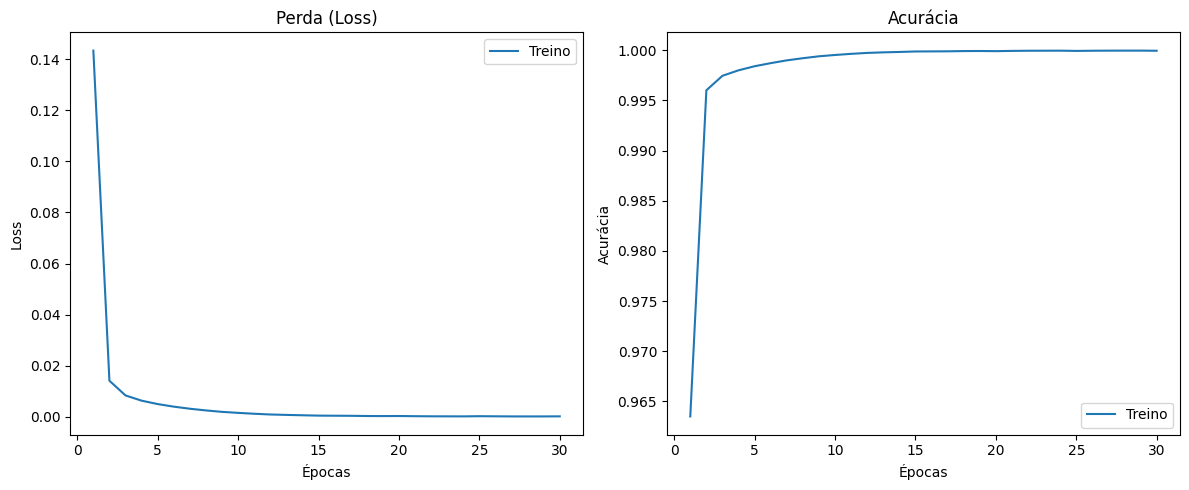

In [ ]:
import matplotlib.pyplot as plt

hist = history.history
epochs = range(1, len(hist['loss']) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, hist['loss'], label='Treino')
plt.title('Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
if 'accuracy' in hist:
    plt.plot(epochs, hist['accuracy'], label='Treino')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow.keras as keras

In [ ]:
model.save("bilstm_contractions_postagger.keras")

# Load model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("bilstm_contractions_postagger.keras")

In [ ]:
model.compiled_metrics

<keras.src.backend.tensorflow.trainer.TensorFlowTrainer.compiled_metrics.<locals>.DeprecatedCompiledMetric at 0x7db4e077c810>

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 251, 128)       │     4,925,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 251, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 251, 256)       │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 251, 44)        │        11,308 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,783,622 (64.02 MB)

 Trainable params: 5,594,540 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,189,082 (42.68 MB)

## Predict

In [ ]:
path = "/content/drive/MyDrive/Penn Treebank/Penn Treebank/Secs22-24 - testing" #Ju

In [ ]:
sentences_test = []
with open(path,'r') as r:
    for line in r:
        parts = line.strip().split()
        pt = [tuple(item.rsplit('_', 1)) for item in parts]
        sentences_test.extend(pt)

In [ ]:
sentences_dataset_spplited = []
with open(path,'r') as r:
    for line in r:
        parts = line.strip().split()
        pt = [tuple(item.rsplit('_', 1)) for item in parts]
        sentences_dataset_spplited.extend([pt])

In [ ]:
import numpy as np

In [ ]:
def predict_tags(model, sentences, word2idx, idx2tag):
    # Extrair só as palavras da sentença
    words = [w for w, _ in sentences]

    # Converter as palavras para índices
    word_ids = [word2idx.get(w.lower(), word2idx['<UNK>']) for w in words]

    # Fazer padding
    padded = tf.keras.preprocessing.sequence.pad_sequences([word_ids], maxlen=max_len, padding='post')
    padded = tf.convert_to_tensor(padded, dtype=tf.int32)

    # Prever
    pred = model.predict(padded)[0]
    pred_tags = [idx2tag[np.argmax(p)] for p in pred[:len(words)]]

    return list(zip(words, pred_tags))


Never run the cell bellow with all the sentences_text list. Because dataset's test has about 130k data.

In [ ]:
y_true = []
y_pred = []

for sentence in sentences_dataset_spplited[:1000]:  # Cada item é uma frase: [('The', 'DT'), ('cat', 'NN'), ...]
    true_tags = [tag for _, tag in sentence]
    predicted_tags = [tag for _, tag in predict_tags(model, sentence, word2idx, idx2tag)]

    y_true.extend(true_tags)
    y_pred.extend(predicted_tags)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

In [ ]:
len(y_true)
len(y_pred)

18847

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#print(classification_report(y_true, y_pred, digits=4))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 macro:", f1_score(y_true, y_pred, average='macro'))


Accuracy: 0.9344192709715075
F1 macro: 0.8045349644937789


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

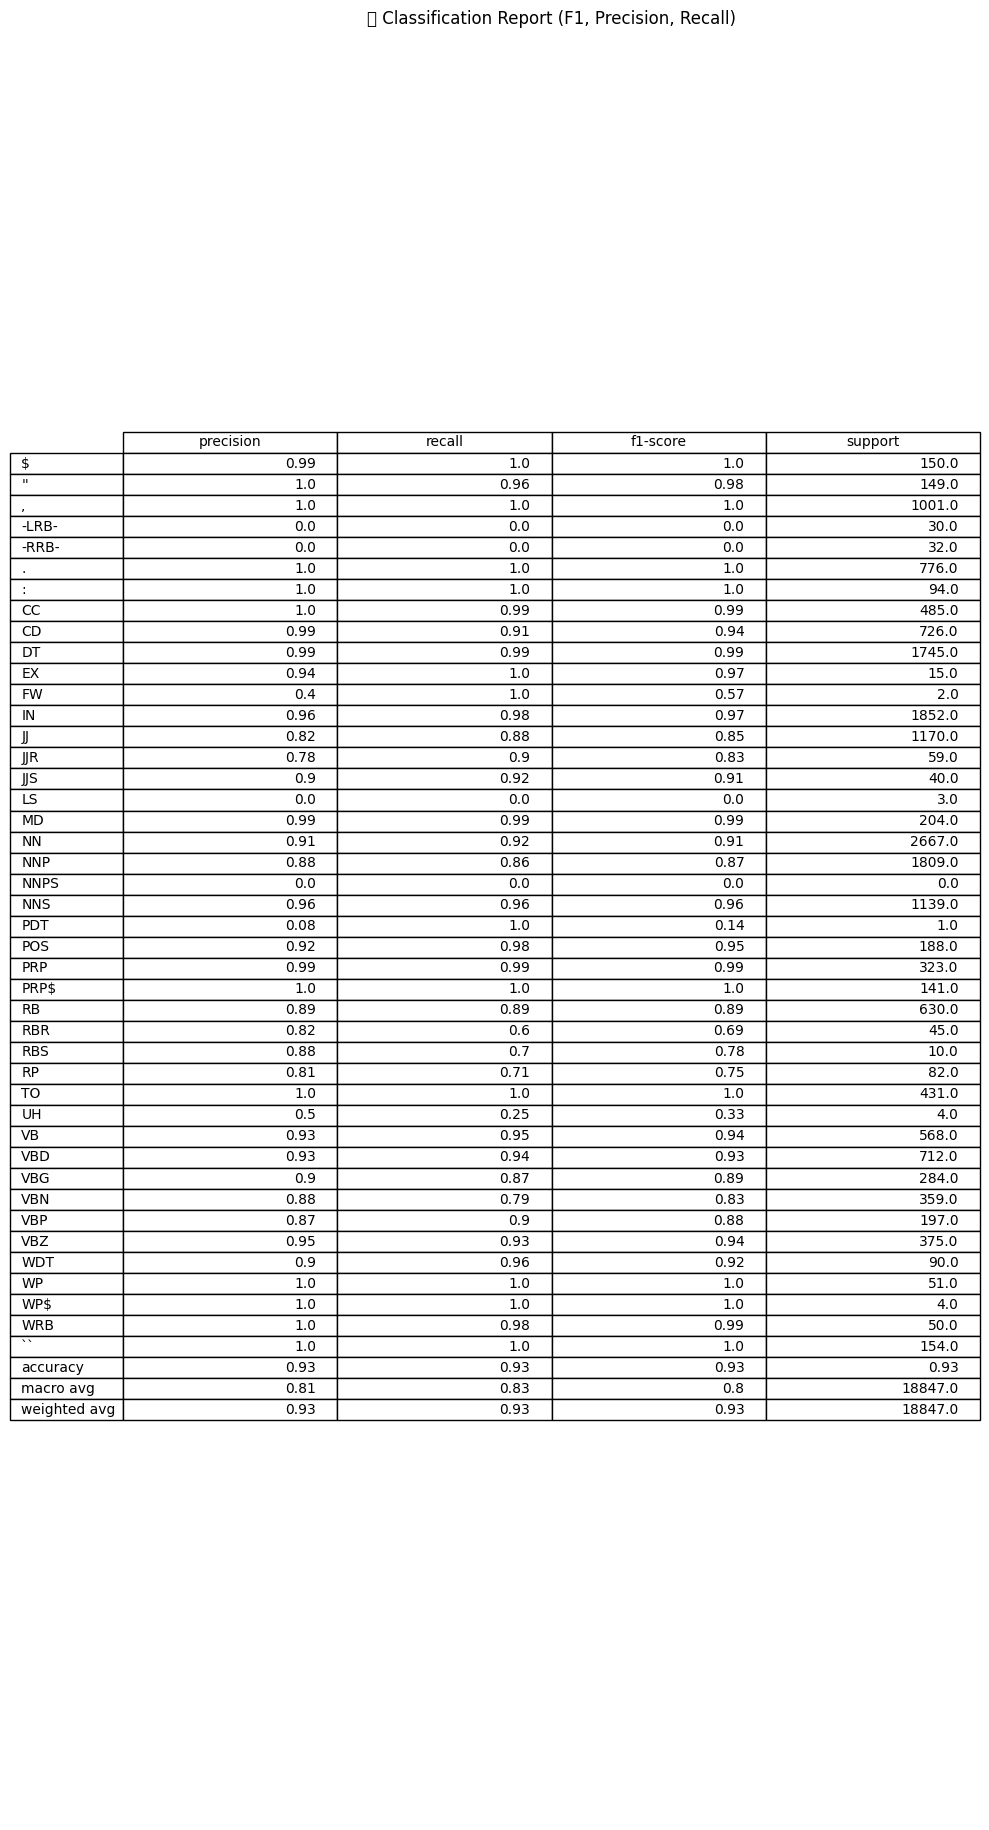

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_true, y_pred, digits=4, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

fig, ax = plt.subplots(figsize=(10, len(df_report) * 0.4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_report.round(2).values,
         colLabels=df_report.columns,
         rowLabels=df_report.index,
         loc='center')
plt.title("📊 Classification Report (F1, Precision, Recall)")
plt.tight_layout()
plt.show()




/tmp/ipython-input-86-1207889945.py:7: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


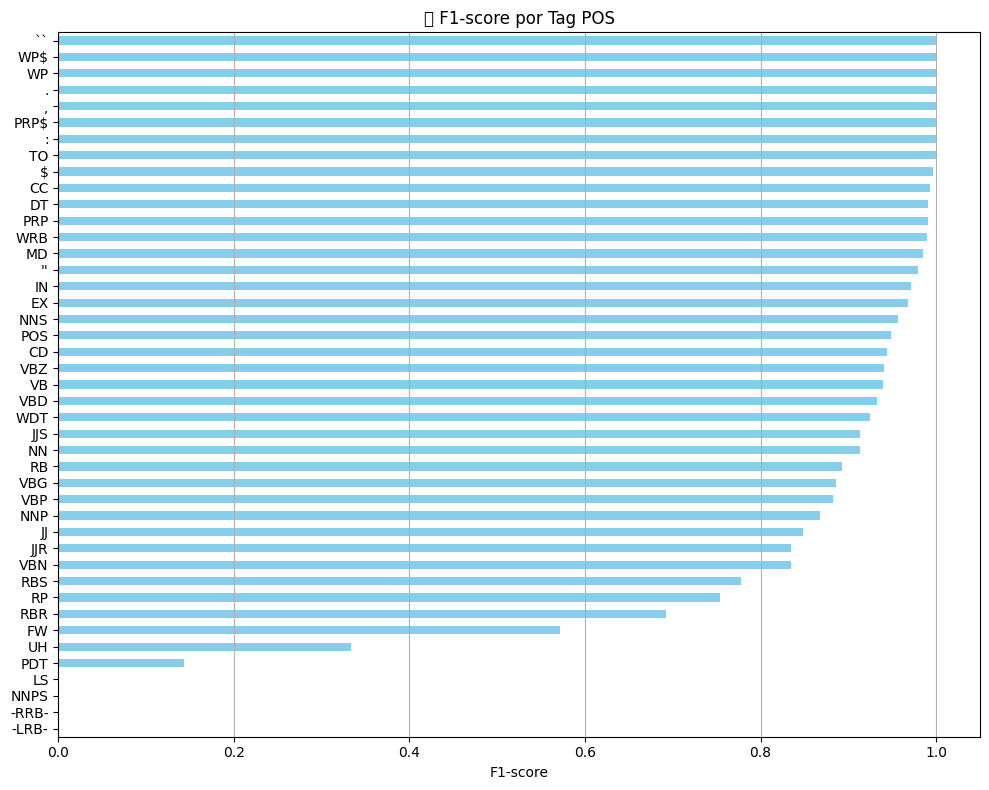

In [ ]:
f1_per_class = df_report.loc[df_report.index.str.len() <= 5].drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')['f1-score']

f1_per_class.sort_values().plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.xlabel("F1-score")
plt.title("📌 F1-score por Tag POS")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt


/tmp/ipython-input-88-489268921.py:13: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


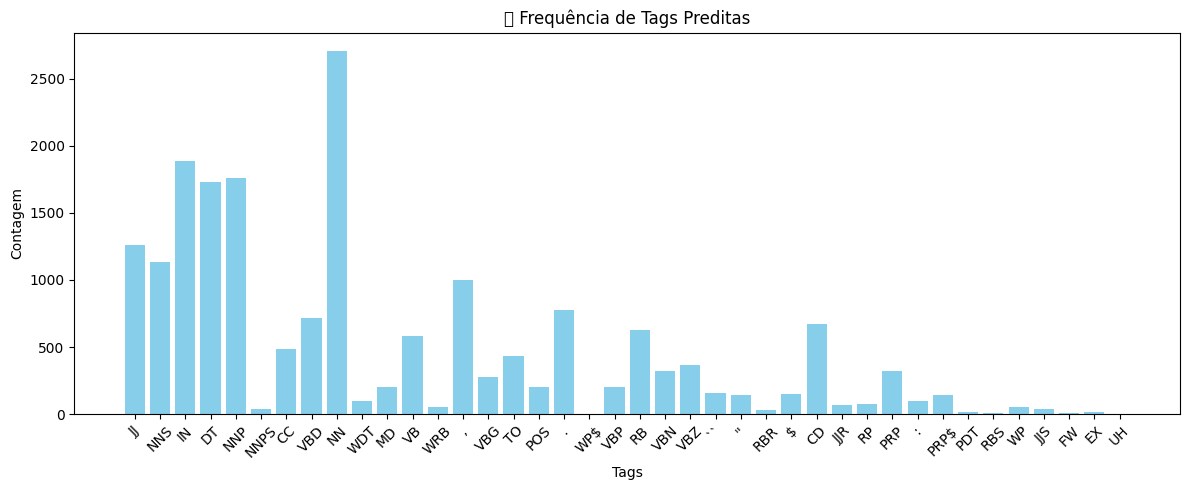

In [ ]:
from collections import Counter

# Conta as tags preditas
tag_counts = Counter(y_pred)

# Plota gráfico de barras
plt.figure(figsize=(12, 5))
plt.bar(tag_counts.keys(), tag_counts.values(), color='skyblue')
plt.title("📌 Frequência de Tags Preditas")
plt.xlabel("Tags")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-89-2512374719.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


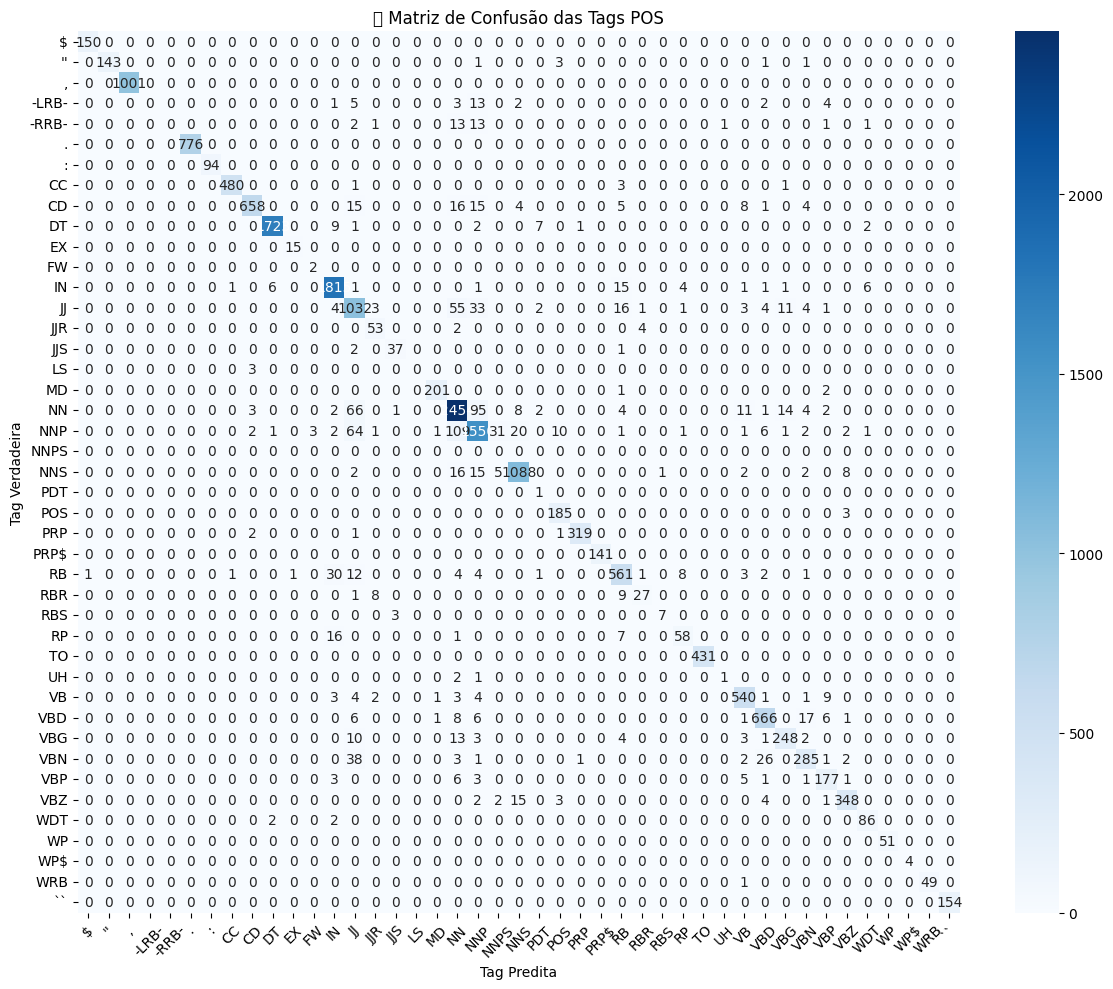

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Cria matriz de confusão
cm = confusion_matrix(y_true, y_pred, labels=sorted(set(y_true + y_pred)))

# Nomes das tags
labels = sorted(set(y_true + y_pred))

# Plot usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Tag Predita")
plt.ylabel("Tag Verdadeira")
plt.title("📊 Matriz de Confusão das Tags POS")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
